<a href="https://colab.research.google.com/github/susanquiros/Project-4--Group-6/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files
uploaded = files.upload()

Saving winequalityN_withname.csv to winequalityN_withname.csv


In [1]:
#importing the energy csv
import pandas as pd
wine_df = pd.read_csv('Resources/winequalityN_withname.csv',encoding='latin-1',header=0)
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,.winename
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,.Beb 2009
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,.Beb 2010
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,.Beb 2011
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,.Beb 2012
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,.Beb 2013


In [2]:
wine_df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
.winename                object
dtype: object

In [3]:
wine_clean= wine_df.dropna()
wine_clean

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,.winename
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,.Beb 2009
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,.Beb 2010
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,.Beb 2011
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,.Beb 2012
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,.Beb 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,Bonefant 2004
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bonefant 2006
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Bons Ares 2003
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bons Ares 2008


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [5]:
model = KMeans(n_clusters=5, random_state=5)

In [6]:
wine_names = wine_clean['.winename'].values
wine_clean = wine_clean.drop('.winename', axis=1)
wine_dummies= pd.get_dummies(wine_clean, drop_first=True)

In [7]:
wine_dummies.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type_white                uint8
dtype: object

In [8]:
wine_clean.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          315
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 996
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [9]:
# 
model.fit(wine_dummies)

KMeans(n_clusters=5, random_state=5)

In [10]:
predictions = model.predict(wine_dummies)
print(predictions)

[3 2 4 ... 0 0 0]


In [11]:
wine_clean["class"] = model.labels_
wine_clean['name'] = wine_names
wine_clean.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,name
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,3,.Beb 2009
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2,.Beb 2010
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,4,.Beb 2011
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,.Beb 2012
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,.Beb 2013


In [12]:
#groupoing by the class to get the average
# wine_dummies['class'] = model.labels_
# wine_dummies.groupby(by =['class']).mean()
wine_clean.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
class                     int32
name                     object
dtype: object

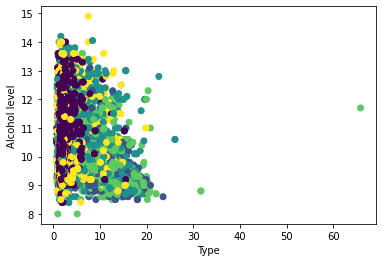

In [13]:
plt.scatter(x=wine_clean["residual sugar"], y=wine_clean['alcohol'], c=wine_clean['class'])
plt.xlabel('Type')
plt.ylabel('Alcohol level')
plt.show()

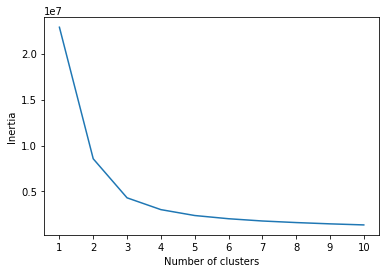

In [14]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(wine_dummies)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:

# from google.colab import drive
# drive.mount('drive')
# wine_clean.to_csv('wine_clean_clustered.csv',index=False)
# !cp wine_clean_clustered.csv 'drive/My Drive'

In [16]:
wine_clean.dtypes


type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
class                     int32
name                     object
dtype: object

In [17]:
wine_clean

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,name
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,3,.Beb 2009
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2,.Beb 2010
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,4,.Beb 2011
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,.Beb 2012
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,.Beb 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0,Bonefant 2004
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0,Bonefant 2006
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0,Bons Ares 2003
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0,Bons Ares 2008


In [23]:
dict = {"type" :"type",
        "fixed acidity":"fixed_acidity",
        "volatile acidity":"volatile_acidity",
        "citric acid": "citric_acid",
        "residual sugar":"residual_sugar",
        "chlorides": "chlorides",
        "free sulfur dioxide": "free_sulfur_dioxide",
        "total sulfur dioxide": "total_sulfur_dioxide",
        "density":"density",
        "pH": "ph",
        "sulphates": "sulphates",
        "alcohol": "alcohol",
        "quality" : "quality",       
        "class" : "class", 
        "name" : "name"                    
        
       }
  
# call rename () method
wine_clean.rename(columns=dict,
          inplace=True)
  
# print Data frame after rename columns
wine_clean

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,class,name
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,3,.Beb 2009
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2,.Beb 2010
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,4,.Beb 2011
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,.Beb 2012
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,.Beb 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0,Bonefant 2004
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0,Bonefant 2006
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0,Bons Ares 2003
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0,Bons Ares 2008


In [60]:
import sqlite3
# conn.close()
conn = sqlite3.connect('wine_database') 
c = conn.cursor()

c.execute('''
Drop TABLE IF EXISTS wine_dataframe;

''')

c.execute('''
          CREATE TABLE wine_dataframe
([type] varchar  NOT NULL,
[fixed_acidity] decimal NOT NULL,
[volatile_acidity] decimal  NOT NULL, 
[citric_acid]decimal NOT NULL, 
[residual_sugar] decimal NOT NULL, 
[chlorides] decimal NOT NULL,
[free_sulfur_dioxide] decimal NOT NULL, 
[total_sulfur_dioxide] decimal NOT NULL, 
[density] decimal NOT NULL, 
[ph] decimal NOT NULL,
[sulphates] decimal NOT NULL,
[alcohol] decimal NOT NULL,
[quality] integer NOT NULL,
[class] integer NOT NULL,
[name] varchar NOT NULL )
          ''')


wine_clean.to_sql('wine_dataframe', conn, if_exists='append', index=False)

conn.commit()
 
c.execute('''  
SELECT * FROM wine_dataframe
          ''')

for row in c.fetchall():
    print (row)  
    
conn.close()

('white', 7, 0.27, 0.36, 20.7, 0.045, 45, 170, 1.001, 3, 0.45, 8.8, 6, 3, '.Beb 2009')
('white', 6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.9940000000000001, 3.3, 0.49, 9.5, 6, 2, '.Beb 2010')
('white', 8.1, 0.28, 0.4, 6.9, 0.05, 30, 97, 0.9951, 3.26, 0.44, 10.1, 6, 4, '.Beb 2011')
('white', 7.2, 0.23, 0.32, 8.5, 0.057999999999999996, 47, 186, 0.9956, 3.19, 0.4, 9.9, 6, 1, '.Beb 2012')
('white', 7.2, 0.23, 0.32, 8.5, 0.057999999999999996, 47, 186, 0.9956, 3.19, 0.4, 9.9, 6, 1, '.Beb 2013')
('white', 8.1, 0.28, 0.4, 6.9, 0.05, 30, 97, 0.9951, 3.26, 0.44, 10.1, 6, 4, '.Beb Selection 2012')
('white', 6.2, 0.32, 0.16, 7, 0.045, 30, 136, 0.9949, 3.18, 0.47, 9.6, 6, 2, '.Beb Selection 2014')
('white', 7, 0.27, 0.36, 20.7, 0.045, 45, 170, 1.001, 3, 0.45, 8.8, 6, 3, '.Com 2007')
('white', 6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.9940000000000001, 3.3, 0.49, 9.5, 6, 2, '.Com 2009')
('white', 8.1, 0.22, 0.43, 1.5, 0.044000000000000004, 28, 129, 0.9938, 3.22, 0.45, 11, 6, 2, '.Com 2010')
('white', 8.1,

('white', 6.5, 0.33, 0.38, 2.5, 0.047, 30, 148, 0.98964, 3.17, 0.43, 12.7, 6, 3, 'Adegaborba.pt 2003')
('white', 6.3, 0.35, 0.26, 17.6, 0.061, 59, 198, 0.99918, 3.11, 0.49, 8.8, 5, 1, 'Adegaborba.pt 2005')
('white', 6.3, 0.17, 0.32, 4.2, 0.04, 37, 117, 0.99182, 3.24, 0.43, 11.3, 6, 2, 'Adegaborba.pt 2006')
('white', 6.6, 0.25, 0.35, 2.9, 0.034, 38, 121, 0.99008, 3.19, 0.4, 12.8, 6, 2, 'Adegaborba.pt 2007')
('white', 6.5, 0.16, 0.33, 4.8, 0.043, 45, 114, 0.992, 3.18, 0.44, 11.2, 6, 2, 'Adegaborba.pt Reserva 2004')
('white', 6.6, 0.39, 0.39, 11.9, 0.057, 51, 221, 0.99851, 3.26, 0.51, 8.9, 6, 1, 'Adegaborba.pt Reserva 2005')
('white', 5.6, 0.19, 0.27, 0.9, 0.04, 52, 103, 0.99026, 3.5, 0.39, 11.2, 5, 2, 'Aegerter Chablis Premier Cru Vieilles Vignes 2013')
('white', 6.2, 0.25, 0.39, 1.3, 0.051, 42, 135, 0.9906, 3.23, 0.4, 11.1, 6, 2, 'Afincado Single Vineyard Malbec 2006')
('white', 6.9, 0.22, 0.43, 6.4, 0.042, 34, 115, 0.99293, 3.05, 0.51, 10.8, 6, 2, 'Afoito Grande Reserva 2011')
('white'

('red', 7, 0.45, 0.34, 2.7, 0.08199999999999999, 16, 72, 0.998, 3.55, 0.6, 9.5, 5, 4, 'Marquês de Borba 2013')
('red', 7.7, 0.56, 0.2, 2, 0.075, 9, 39, 0.9987, 3.48, 0.62, 9.3, 5, 0, 'Marquês de Borba 2014')
('red', 7.7, 0.965, 0.1, 2.1, 0.11199999999999999, 11, 22, 0.9963, 3.26, 0.5, 9.5, 5, 0, 'Marquês de Borba 2015')
('red', 7.7, 0.965, 0.1, 2.1, 0.11199999999999999, 11, 22, 0.9963, 3.26, 0.5, 9.5, 5, 0, 'Marquês de Borba 2016')
('red', 8.2, 0.59, 0, 2.5, 0.09300000000000001, 19, 58, 1.0002, 3.5, 0.65, 9.3, 6, 4, 'Marquês de Borba 2017')
('red', 9, 0.46, 0.23, 2.8, 0.092, 28, 104, 0.9983, 3.1, 0.56, 9.2, 5, 2, 'Marquês de Borba Colheita 2017')
('red', 9, 0.69, 0, 2.4, 0.08800000000000001, 19, 38, 0.9990000000000001, 3.35, 0.6, 9.3, 5, 0, 'Marquês de Borba Colheita 2018')
('red', 8.3, 0.76, 0.29, 4.2, 0.075, 12, 16, 0.9965, 3.45, 0.68, 11.5, 6, 0, 'Marquês de Borba Reserva 1997')
('red', 9.2, 0.53, 0.24, 2.6, 0.078, 28, 139, 0.9978799999999999, 3.21, 0.57, 9.5, 5, 2, 'Marquês de Borb

In [62]:
connection = sqlite3.connect('wine_database') 
df = pd.read_sql(f"select name from wine_dataframe where class = 1 order by random() limit 1 ",connection)
df.head()
connection.close()